# Slope Fitting Dev Data

In [9]:
# Imports
import os
import numpy as np
import pandas as pd

from slf.fit import *
from slf.dat import *
from slf.core.db import SLFDB

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# Load data readme file
rmd_file = os.path.join(db.data_path, 'EEGDev', 'MIPDB_PublicFile.csv')
df = pd.read_csv(rmd_file, index_col='ID')

In [75]:
# Get available subject PSD files
db = SLFDB()
db.psd_path = '/Users/thomasdonoghue/Documents/GitCode/SlopeFitOscs/data/psds/'
psd_files = db.get_psd_files()

In [110]:
#
subjs = [ff.split('_')[0] for ff in psd_files]

subj_files = [{'ID': subj, 'EC': ec_f, 'EO': eo_f} for subj, ec_f, eo_f in zip(subjs[0::2],
                                                [fi for fi in psd_files if 'ec' in fi],
                                                [fi for fi in psd_files if 'eo' in fi])]

In [167]:
# Set fit func to use
ffn = fsl_ransac

# Eyes Closed Data
ec_sl_df = pd.DataFrame(columns=['ID', 'Age', 'MeanSl', 'MedianSl'])

for sf in subj_files:
    
    freqs, psds, chans = load_psd(os.path.join(db.psd_path, sf['EC']))

    sls = fit_sls(freqs, psds, ffn)

    sl_dat = {'ID': sf['ID'], 'Age': df.ix[sf['ID']]['Age'],
              'MeanSl': np.mean(sls), 'MedianSl': np.median(sls)}

    ec_sl_df = ec_sl_df.append(sl_dat, ignore_index=True)

    
# Eyes Open Data    
eo_sl_df = pd.DataFrame(columns=['ID', 'Age', 'MeanSl', 'MedianSl'])

for sf in subj_files:

    freqs, psds, chans = load_psd(os.path.join(db.psd_path, sf['EO']))

    sls = fit_sls(freqs, psds, ffn)

    sl_dat = {'ID': sf['ID'], 'Age': df.ix[sf['ID']]['Age'],
              'MeanSl': np.mean(sls), 'MedianSl': np.median(sls)}

    eo_sl_df = eo_sl_df.append(sl_dat, ignore_index=True)
    

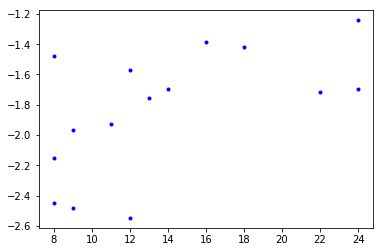

In [168]:
# Check EC Data Slope Vals
plt.figure()
plt.plot(ec_sl_df.Age, ec_sl_df.MeanSl, 'b.')

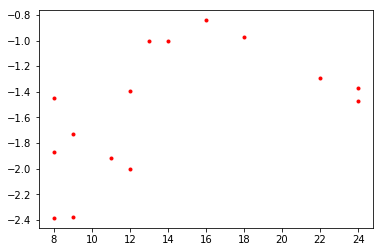

In [169]:
# Check EO Data Slope Vals
plt.figure()
plt.plot(eo_sl_df.Age, eo_sl_df.MeanSl, 'r.')

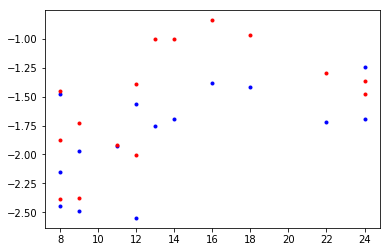

In [171]:
# Plot EC & EO Data Together
plt.figure()
plt.plot(ec_sl_df.Age, ec_sl_df.MeanSl, 'b.')
plt.plot(eo_sl_df.Age, eo_sl_df.MeanSl, 'r.')